Import Required Libraries

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

Load the Dataset

In [33]:
from google.colab import files
uploaded = files.upload()

Saving links.csv to links.csv
Saving Movie recommendation system .ipynb to Movie recommendation system .ipynb
Saving movies.csv to movies (2).csv
Saving ratings.csv to ratings.csv
Saving README.txt to README.txt
Saving Recommendation engine 2.ipynb to Recommendation engine 2.ipynb
Saving tags.csv to tags.csv


In [27]:
movies = pd.read_csv('movies.csv')
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


Data Cleaning

In [28]:
# Check for missing values
print(movies.isnull().sum())

# Remove duplicates
movies.drop_duplicates(inplace=True)

# Reset index after cleaning
movies.reset_index(drop=True, inplace=True)

movieId    0
title      0
genres     0
dtype: int64


Basic Data Analysis & Visualization

In [29]:
# Basic statistics
print("\nBasic dataset info:")
print(movies.describe())

# Flatten the list of genres
genres = [genre for sublist in movies['genres'] for genre in sublist]

# Create a DataFrame of genre counts
genre_counts = pd.Series(genres).value_counts()


Basic dataset info:
             movieId
count    9742.000000
mean    42200.353623
std     52160.494854
min         1.000000
25%      3248.250000
50%      7300.000000
75%     76232.000000
max    193609.000000


Visualization

<ipython-input-30-2f5955bd7dbe>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='Set2')


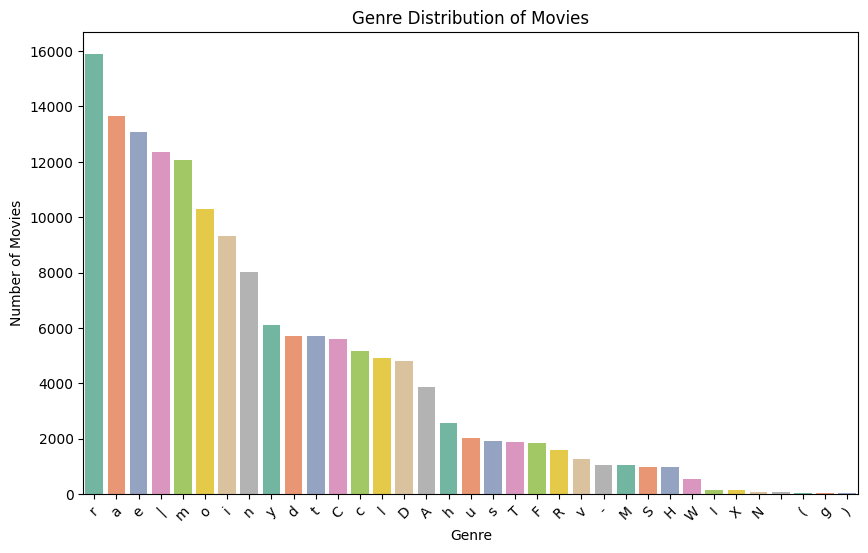

<ipython-input-30-2f5955bd7dbe>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='genres', data=movies.explode('genres'), palette='Set2')


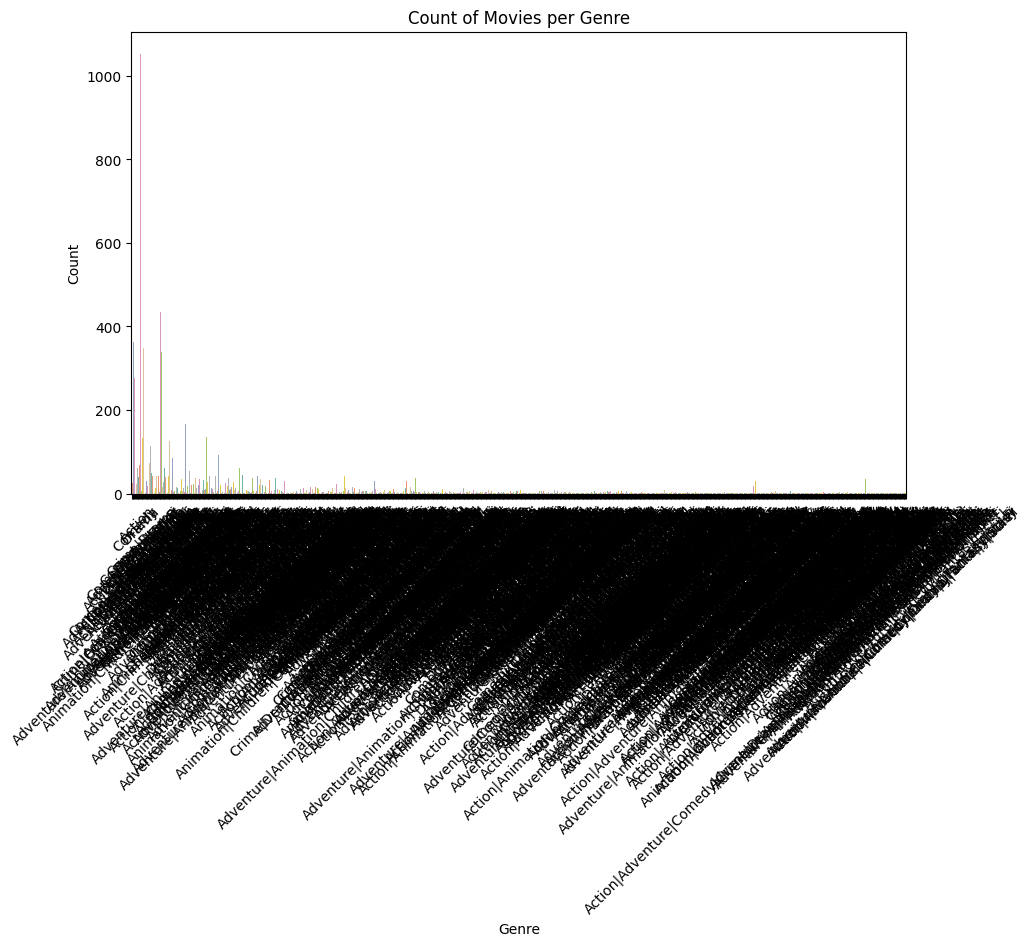

In [30]:
# Visualize genre distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='Set2')
plt.title('Genre Distribution of Movies')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.show()

# Visualize the count of movies per genre
plt.figure(figsize=(10, 6))
sns.countplot(x='genres', data=movies.explode('genres'), palette='Set2')
plt.title('Count of Movies per Genre')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

Movie Recommendation

In [ ]:
ratings = pd.read_csv('ratings.csv')
ratings.drop('timestamp',axis=1,inplace=True)
movies.head()

movie_data = pd.merge(ratings,movies,on='movieId')
#movie_data.groupby('title')['rating'].count().sort_values(ascending=False)
#print(movie_data)

mean_ratings = pd.DataFrame(movie_data.groupby('title')['rating'].mean())
mean_ratings['counts'] = movie_data.groupby('title')['rating'].count()

movie_by_user = movie_data.pivot_table(index='userId',columns='title',values='rating')
#print(movie_by_user)

mov = input('Enter your movie :')

user_ratings = movie_by_user[mov]
user_like = movie_by_user.corrwith(user_ratings)
corr_like = pd.DataFrame(user_like,columns=['Correlation'])
corr_like.dropna(inplace=True)
corr_like.sort_values(by='Correlation',ascending=False)
corr_like = corr_like.join(mean_ratings['counts'])
mtw = corr_like[corr_like['counts']>50].sort_values('Correlation',ascending=False).head(10).index.tolist()
print('We recommend the following movies : \n')
for i in mtw:
    print(i)